In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv('C:\\Users\\hemav\\OneDrive\\Desktop\\python\\car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
list(set(df))

['Driven_kms',
 'Owner',
 'Fuel_Type',
 'Car_Name',
 'Year',
 'Transmission',
 'Selling_Price',
 'Present_Price',
 'Selling_type']

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.shape

(301, 9)

In [9]:
str(df)

'    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \\\n0       ritz  2014           3.35           5.59       27000    Petrol   \n1        sx4  2013           4.75           9.54       43000    Diesel   \n2       ciaz  2017           7.25           9.85        6900    Petrol   \n3    wagon r  2011           2.85           4.15        5200    Petrol   \n4      swift  2014           4.60           6.87       42450    Diesel   \n..       ...   ...            ...            ...         ...       ...   \n296     city  2016           9.50          11.60       33988    Diesel   \n297     brio  2015           4.00           5.90       60000    Petrol   \n298     city  2009           3.35          11.00       87934    Petrol   \n299     city  2017          11.50          12.50        9000    Diesel   \n300     brio  2016           5.30           5.90        5464    Petrol   \n\n    Selling_type Transmission  Owner  \n0         Dealer       Manual      0  \n1         Dealer

In [10]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
df['current_Year'] = 2025
df['car_age'] = df['current_Year'] - df['Year']


In [22]:
df['car_age']

0      11
1      12
2       8
3      14
4      11
       ..
296     9
297    10
298    16
299     8
300     9
Name: car_age, Length: 301, dtype: int64

In [30]:
df=df.drop(['Car_Name','Year','current_year'],axis=1,errors='ignore')


In [32]:
df = pd.get_dummies(df, drop_first=True)
df

,Selling_Price,Present_Price,Driven_kms,Owner,year,current_Year,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2025,2025,11,False,True,False,True
1,4.75,9.54,43000,0,2025,2025,12,True,False,False,True
2,7.25,9.85,6900,0,2025,2025,8,False,True,False,True
3,2.85,4.15,5200,0,2025,2025,14,False,True,False,True
4,4.60,6.87,42450,0,2025,2025,11,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,2025,2025,9,True,False,False,True
297,4.00,5.90,60000,0,2025,2025,10,False,True,False,True
298,3.35,11.00,87934,0,2025,2025,16,False,True,False,True
299,11.50,12.50,9000,0,2025,2025,8,True,False,False,True


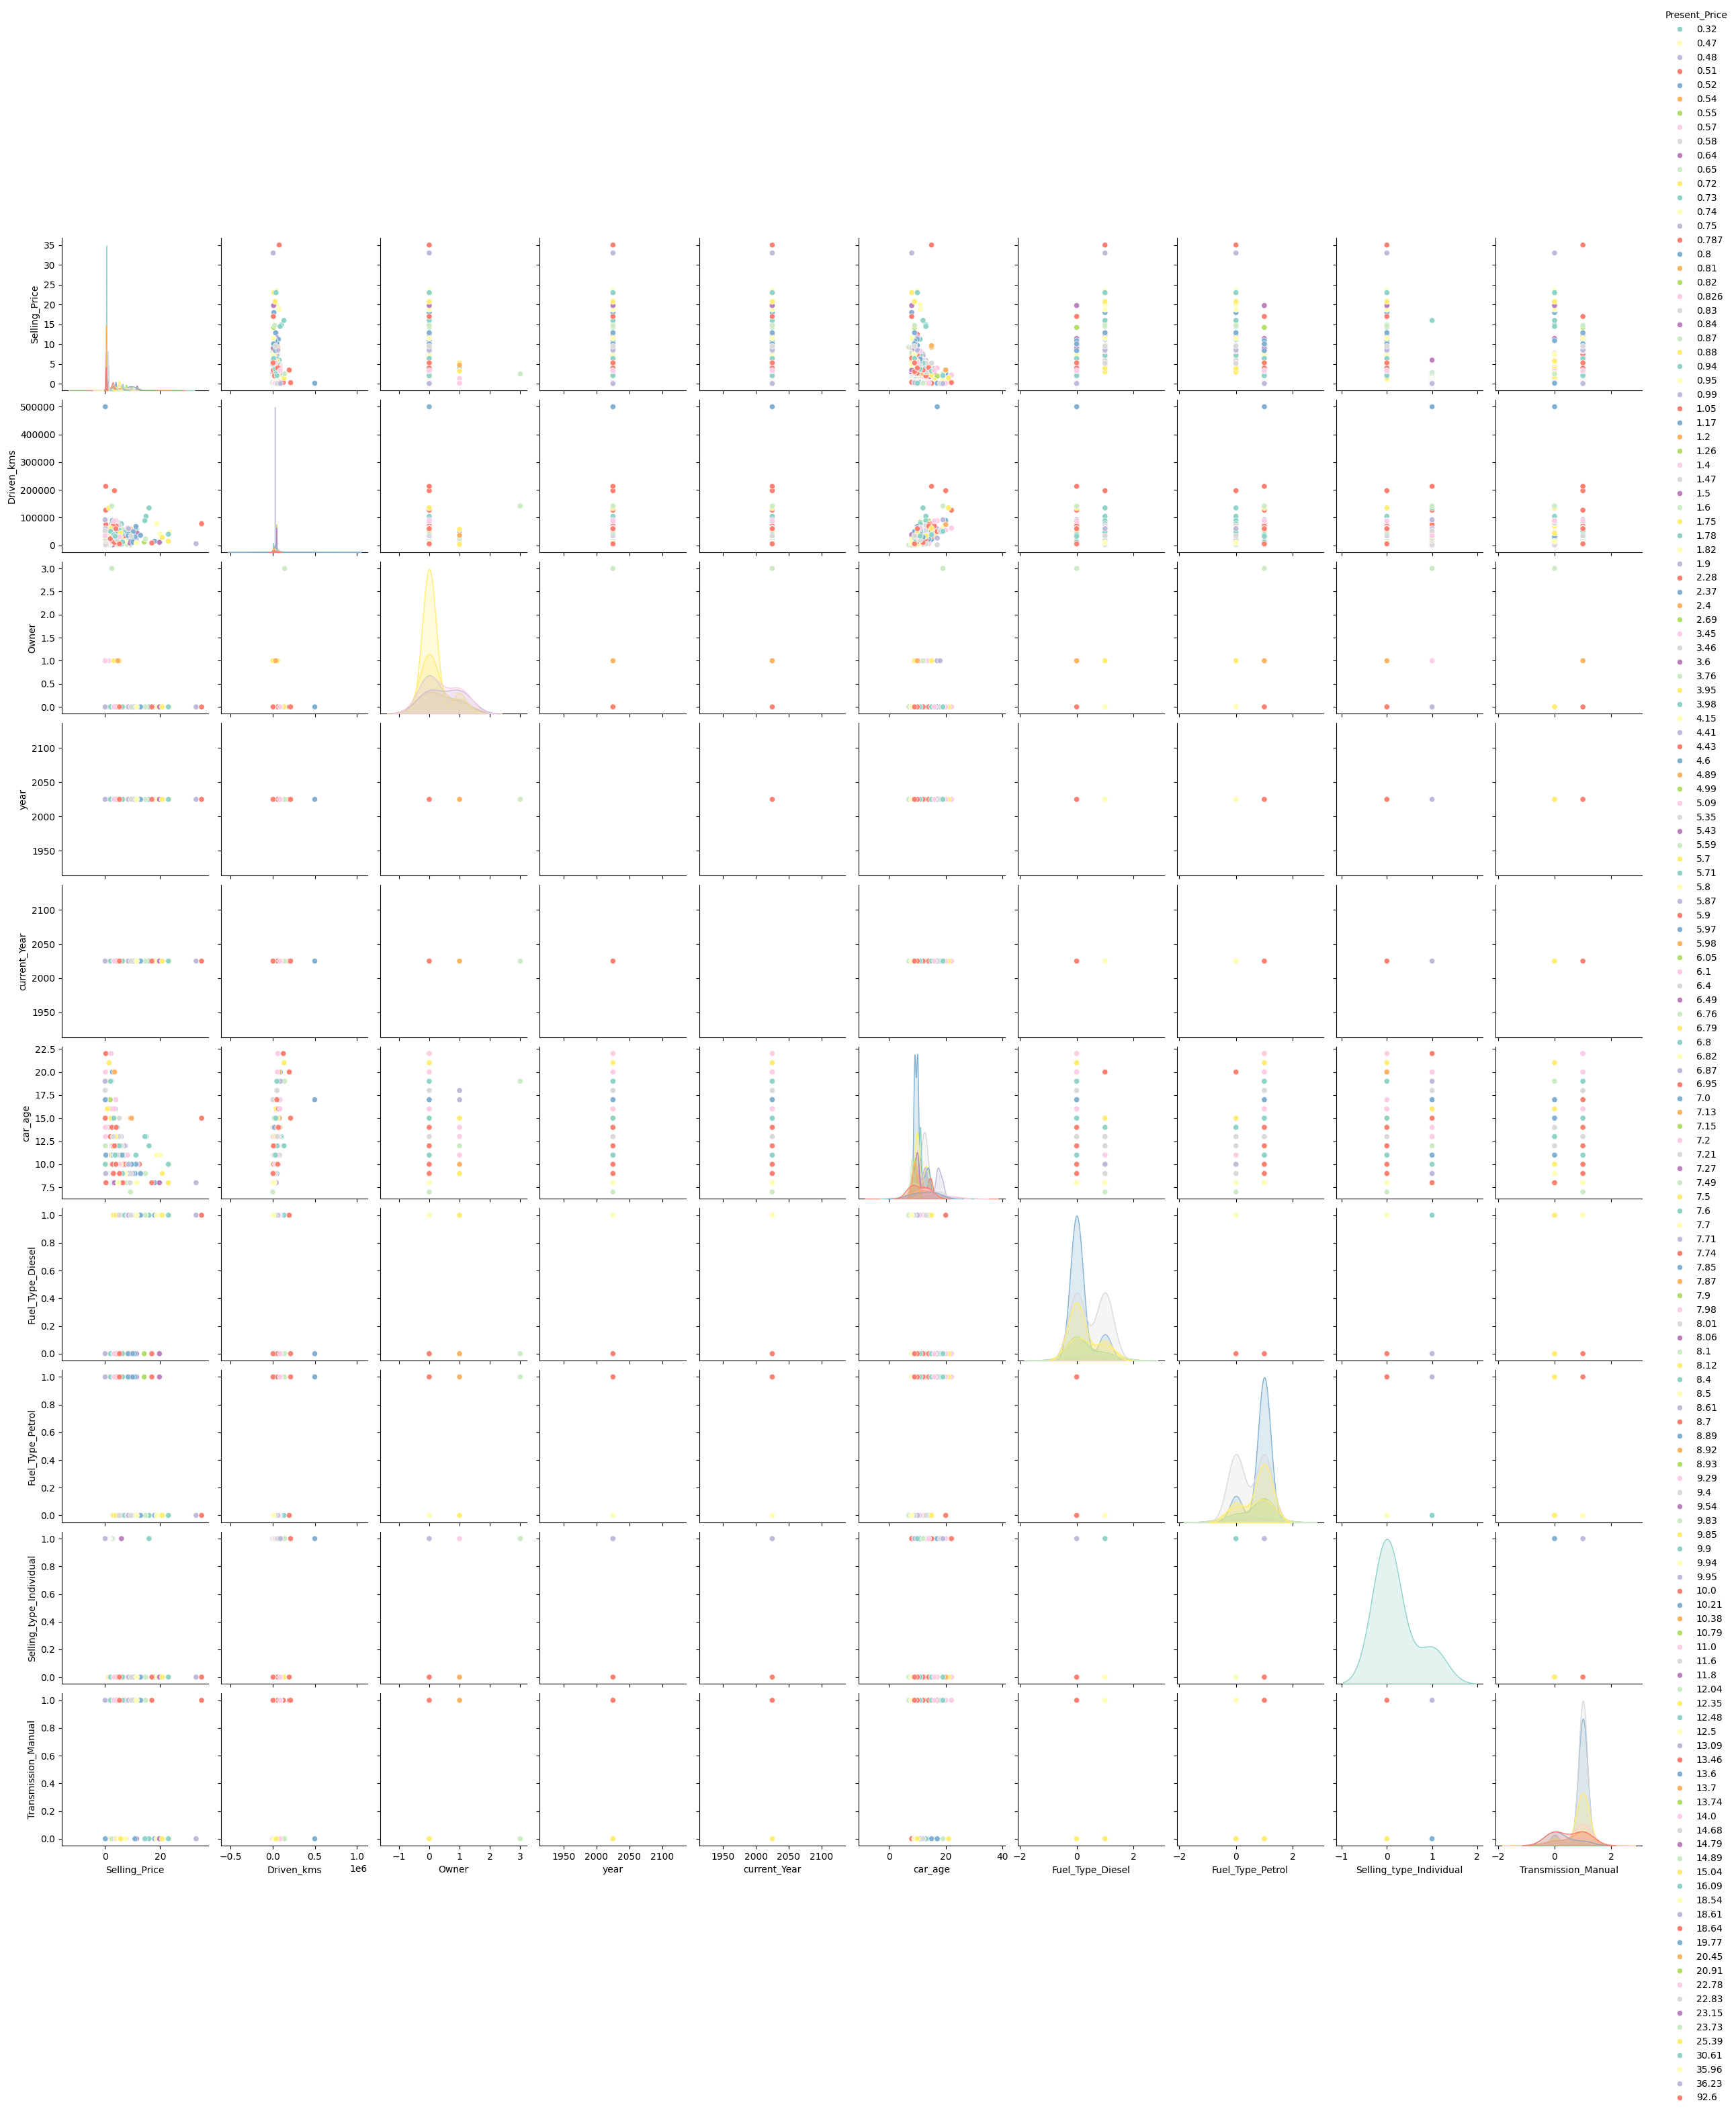

In [36]:
sns.pairplot(df,hue='Present_Price',palette='Set3')

<Axes: >

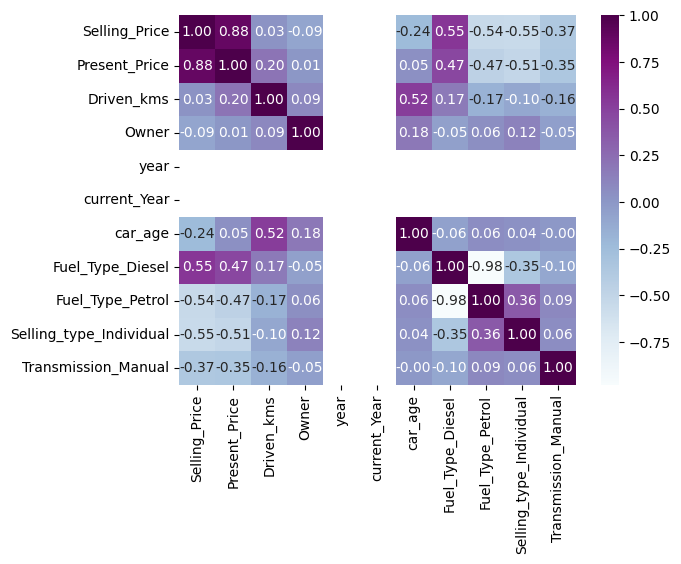

In [46]:
sns.heatmap(df.corr(),cmap='BuPu',fmt=".2f",annot=True)

In [47]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred = model.predict(X_test)

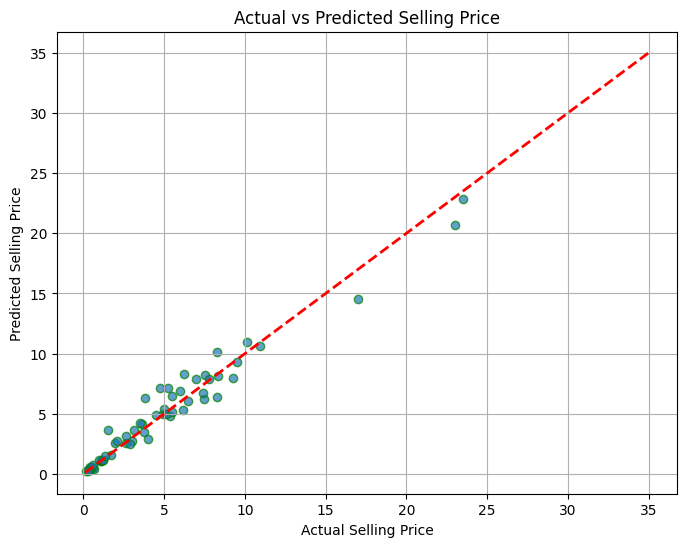

In [51]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors='g', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.grid(True)
plt.show()

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [53]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error: 0.64
Mean Squared Error: 0.93
Root Mean Squared Error: 0.97
R^2 Score: 0.96


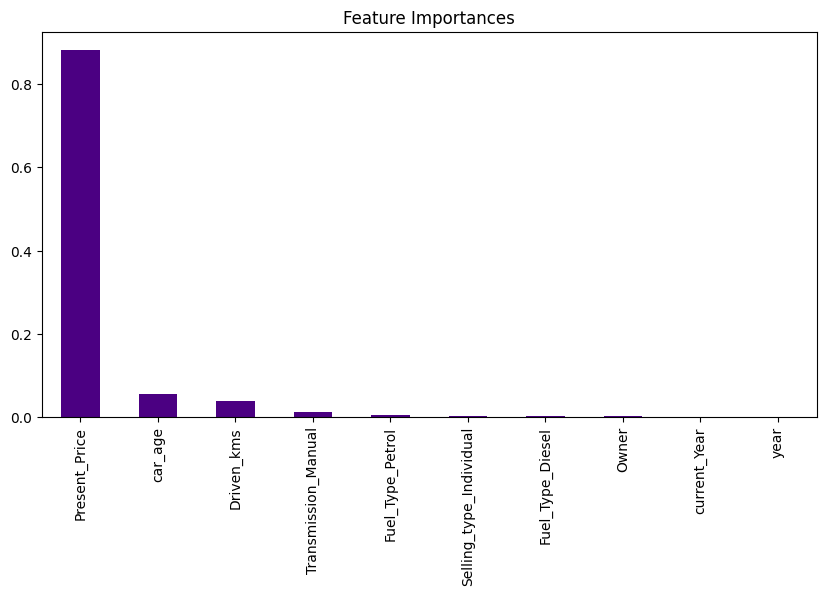

In [55]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='indigo',figsize=(10, 5), title='Feature Importances')
plt.show()